# 4.10. TASK - Part 1 - Coding Etiquette & Excel Reporting

### This script contains the following points:

##### 01. Importing
##### 02. Security Implications and PII Data
##### 03. Customer Behavior in Different Geographic Areas
##### 04. Low-Activity Customers
##### 05. Setting up Customer Profiles
##### 06. Data Visualizations on Distribution of Profiles
##### 07. Usage Frequency and Expenditure
##### 08. Comparing Customer Profiles with Regions and Departments
##### 09. Data Visualization

## 01. Importing

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# folder path to main project folder
path = r'C:\Users\ThinkPad T570\Documents\01-2024 Instacart Basket Analysis'

In [3]:
# importing user_history.pkl dataframe
df_user_history = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'user_history.pkl'))

In [4]:
df_user_history.shape

(32404859, 28)

In [5]:
df_user_history.head()

,user_id,First Name,Surname,Gender,Age,State,date_joined,fam_status,n_dependants,income,...,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,Busiest_days,busiest_day,busiest_period_of_day
0,138,Charles,Cox,Male,81,Minnesota,8/1/2019,married,1,49620,...,3139998,28,6,11,3.0,5,0,Regular days,Regularly busy,Most orders
1,138,Charles,Cox,Male,81,Minnesota,8/1/2019,married,1,49620,...,1977647,30,6,17,20.0,1,1,Regular days,Regularly busy,Average orders
2,138,Charles,Cox,Male,81,Minnesota,8/1/2019,married,1,49620,...,3160996,1,5,13,NaN,4,0,Regular days,Regularly busy,Most orders
3,138,Charles,Cox,Male,81,Minnesota,8/1/2019,married,1,49620,...,2254091,10,5,14,6.0,1,1,Regular days,Regularly busy,Most orders
4,138,Charles,Cox,Male,81,Minnesota,8/1/2019,married,1,49620,...,505689,9,6,12,7.0,5,0,Regular days,Regularly busy,Most orders


## 02. Security Implications and PII Data

In [6]:
df_user_history.columns

Index(['user_id', 'First Name', 'Surname', 'Gender', 'Age', 'State',
       'date_joined', 'fam_status', 'n_dependants', 'income', 'loyalty_flag',
       'spending_flag', 'ord_frequency_flag', 'product_id', 'product_name',
       'aisle_id', 'department_id', 'prices', 'order_id', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'Busiest_days', 'busiest_day',
       'busiest_period_of_day'],
      dtype='object')

In [4]:
# suspending any PII (personally identifiable information) columns from further analysis
df_user_history_PII_clean = df_user_history.drop(['Surname'], axis=1)

In [8]:
df_user_history_PII_clean.shape

(32404859, 27)

In [9]:
df_user_history_PII_clean.head()

,user_id,First Name,Gender,Age,State,date_joined,fam_status,n_dependants,income,loyalty_flag,...,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,Busiest_days,busiest_day,busiest_period_of_day
0,138,Charles,Male,81,Minnesota,8/1/2019,married,1,49620,Regular customer,...,3139998,28,6,11,3.0,5,0,Regular days,Regularly busy,Most orders
1,138,Charles,Male,81,Minnesota,8/1/2019,married,1,49620,Regular customer,...,1977647,30,6,17,20.0,1,1,Regular days,Regularly busy,Average orders
2,138,Charles,Male,81,Minnesota,8/1/2019,married,1,49620,Regular customer,...,3160996,1,5,13,NaN,4,0,Regular days,Regularly busy,Most orders
3,138,Charles,Male,81,Minnesota,8/1/2019,married,1,49620,Regular customer,...,2254091,10,5,14,6.0,1,1,Regular days,Regularly busy,Most orders
4,138,Charles,Male,81,Minnesota,8/1/2019,married,1,49620,Regular customer,...,505689,9,6,12,7.0,5,0,Regular days,Regularly busy,Most orders


## 03. Customer Behavior in Different Geographic Areas

In [5]:
# Creating a regional segmentation ("Northeast", "Midwest", "South", "West")
def state_to_region(state):
    if state in ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']:
        return 'Northeast'
    elif state in ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']:
        return 'Midwest'
    elif state in ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']:
        return 'South'
    elif state in ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']:
        return 'West'
    else:
        return 'Other'

df_user_history_PII_clean['Region'] = df_user_history_PII_clean['State'].apply(state_to_region)

In [11]:
df_user_history_PII_clean.head()

,user_id,First Name,Gender,Age,State,date_joined,fam_status,n_dependants,income,loyalty_flag,...,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,Busiest_days,busiest_day,busiest_period_of_day,Region
0,138,Charles,Male,81,Minnesota,8/1/2019,married,1,49620,Regular customer,...,28,6,11,3.0,5,0,Regular days,Regularly busy,Most orders,Midwest
1,138,Charles,Male,81,Minnesota,8/1/2019,married,1,49620,Regular customer,...,30,6,17,20.0,1,1,Regular days,Regularly busy,Average orders,Midwest
2,138,Charles,Male,81,Minnesota,8/1/2019,married,1,49620,Regular customer,...,1,5,13,NaN,4,0,Regular days,Regularly busy,Most orders,Midwest
3,138,Charles,Male,81,Minnesota,8/1/2019,married,1,49620,Regular customer,...,10,5,14,6.0,1,1,Regular days,Regularly busy,Most orders,Midwest
4,138,Charles,Male,81,Minnesota,8/1/2019,married,1,49620,Regular customer,...,9,6,12,7.0,5,0,Regular days,Regularly busy,Most orders,Midwest


In [6]:
# examining the relationship between region and spending habits
pd.crosstab(df_user_history_PII_clean['Region'], df_user_history_PII_clean['spending_flag'], margins=True)

spending_flag,High Spender,Low Spender,All
Region,,,
Midwest,155975,7441350,7597325
Northeast,108225,5614511,5722736
South,209691,10582194,10791885
West,160354,8132559,8292913
All,634245,31770614,32404859


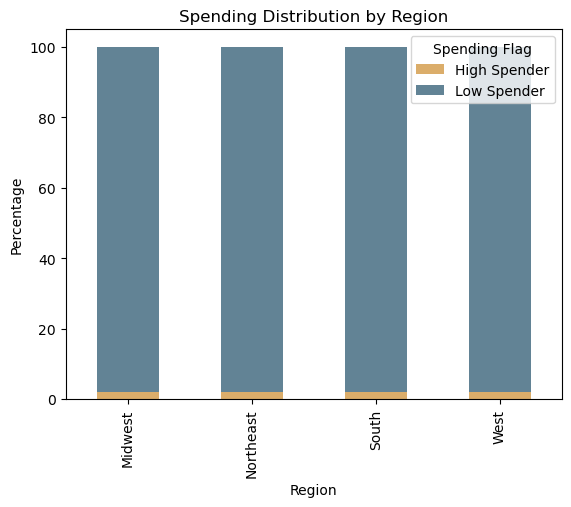

In [14]:
# making groups and normalizing the result
spending_by_region = df_user_history_PII_clean.groupby('Region')['spending_flag'].value_counts(normalize=True).unstack() * 100

#defining colors
colors = ['#DBAD6A', '#628395']

# Plotting the bar chart
ax = spending_by_region.plot(kind='bar', stacked=True, color=colors)

# Adding labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Percentage')
ax.set_title('Spending Distribution by Region')

# Display the legend
ax.legend(title='Spending Flag', loc='upper right')

In [23]:
# exporting bar chart
ax.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spending_region.png'))

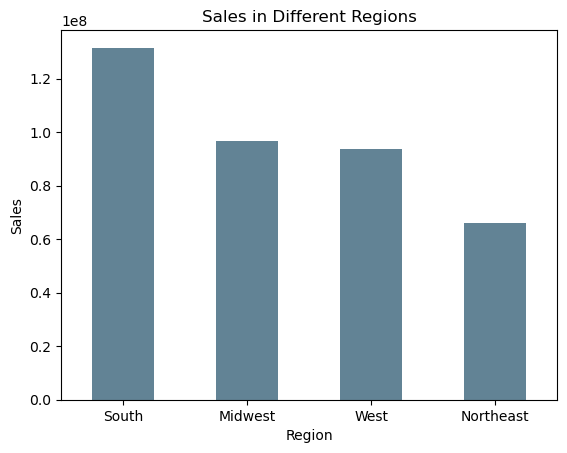

In [17]:
#purchased product prices in different regions
bar_price_region = df_user_history_PII_clean.groupby('Region')['prices'].sum().sort_values(ascending=False).plot.bar(
    title='Sales in Different Regions', xlabel='Region', ylabel='Sales', color='#628395'
)
plt.xticks(rotation=0)
plt.show()

In [24]:
# exporting bar chart
bar_price_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_prices_region.png'))

## 04. Low-Activity Customers

In [7]:
# counting the number of unique orders for each user
df_user_history_PII_clean['order_counts'] = df_user_history_PII_clean.groupby('user_id')['order_id'].transform('count')

In [11]:
# creating flags in column "Expenditure", categorizing in Low- & Regular Customer
df_user_history_PII_clean.loc[df_user_history_PII_clean['order_counts'] <= 5, 'Expenditure'] = 'Low-Activity Customer'

In [9]:
df_user_history_PII_clean.loc[df_user_history_PII_clean['order_counts'] > 5, 'Expenditure'] = 'Regular Customer'

In [28]:
df_user_history_PII_clean.head()

,user_id,First Name,Gender,Age,State,date_joined,fam_status,n_dependants,income,loyalty_flag,...,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,Busiest_days,busiest_day,busiest_period_of_day,Region,order_counts,Expenditure
0,138,Charles,Male,81,Minnesota,8/1/2019,married,1,49620,Regular customer,...,11,3.0,5,0,Regular days,Regularly busy,Most orders,Midwest,148,Regular Customer
1,138,Charles,Male,81,Minnesota,8/1/2019,married,1,49620,Regular customer,...,17,20.0,1,1,Regular days,Regularly busy,Average orders,Midwest,148,Regular Customer
2,138,Charles,Male,81,Minnesota,8/1/2019,married,1,49620,Regular customer,...,13,NaN,4,0,Regular days,Regularly busy,Most orders,Midwest,148,Regular Customer
3,138,Charles,Male,81,Minnesota,8/1/2019,married,1,49620,Regular customer,...,14,6.0,1,1,Regular days,Regularly busy,Most orders,Midwest,148,Regular Customer
4,138,Charles,Male,81,Minnesota,8/1/2019,married,1,49620,Regular customer,...,12,7.0,5,0,Regular days,Regularly busy,Most orders,Midwest,148,Regular Customer


In [12]:
#printing
df_user_history_PII_clean['Expenditure'].value_counts(dropna=False)

Expenditure
Regular Customer         32398590
Low-Activity Customer        6269
Name: count, dtype: int64

In [13]:
# Excluding low-activity customers from the data
df_regular = df_user_history_PII_clean[df_user_history_PII_clean['Expenditure'] == 'Regular Customer']

In [33]:
df_regular.shape

(32398590, 30)

In [19]:
# Exporting data to pkl
df_regular.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'merged_regular_customers.pkl'))

## 05. Setting up Customer Profiles

In [14]:
# importing departments.csv dataframe
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [15]:
# transposing the datafram to check department names
df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [25]:
df_regular.columns

Index(['user_id', 'First Name', 'Gender', 'Age', 'State', 'date_joined',
       'fam_status', 'n_dependants', 'income', 'loyalty_flag', 'spending_flag',
       'ord_frequency_flag', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'Busiest_days', 'busiest_day', 'busiest_period_of_day',
       'Region', 'order_counts', 'Expenditure'],
      dtype='object')

In [16]:
#making a sub dataframe for next question.
selected_columns = ['product_id', 'product_name', 'department_id', 'prices',
                    'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order', 
                    'busiest_day', 'busiest_period_of_day', 'loyalty_flag', 'spending_flag', 'ord_frequency_flag', 'Gender', 'State', 'Age', 'n_dependants', 'fam_status',
                    'income','Region']

In [17]:
df_regular_sub=df_regular[selected_columns]

In [24]:
df_regular_sub.shape

(32398590, 22)

In [18]:
#Creating a true or false list to the test np.random.rant <=0.7
np.random.seed(4)
dev = np.random.rand(len(df_regular_sub)) <= 0.7

In [19]:
#Storing 70% of the sample in dataframe 'big'
big = df_regular_sub[dev]

In [20]:
#Storing 30% of the sample in dataframe 'small'
small = df_regular_sub[~dev]

NOTE: From this point forward, all analyses and visualizations will be based on the 70/30 sample file created in the previous section to avoid potential memory errors. The file small dataframe contains a 30% randomized sample data from the complete dataset.

In [29]:
small.shape

(9719250, 22)

In [21]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [31]:
small['income'].describe()

count   9719250.00
mean      99444.83
std       43066.64
min       25903.00
25%       66998.00
50%       96622.00
75%      127916.00
max      593901.00
Name: income, dtype: float64

In [23]:
# Set the income thresholds for low and high income
low_income_threshold = 50000
high_income_threshold = 100000

In [24]:
# Creating a new column 'income_category' based on the 'income' column
small['income_category'] = pd.cut(
    small['income'],
    bins=[-float('inf'), low_income_threshold, high_income_threshold, float('inf')],
    labels=['Low Income', 'Middle Income', 'High Income'],
    include_lowest=True)

C:\Users\ThinkPad T570\AppData\Local\Temp\ipykernel_9412\988157957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['income_category'] = pd.cut(


In [36]:
small.head()

,product_id,product_name,department_id,prices,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,...,spending_flag,ord_frequency_flag,Gender,State,Age,n_dependants,fam_status,income,Region,income_category
0,1,Chocolate Sandwich Cookies,19,5.80,138,28,6,11,3.00,5,...,Low Spender,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest,Low Income
2,907,Premium Sliced Bacon,12,20.00,138,1,5,13,NaN,4,...,Low Spender,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest,Low Income
3,907,Premium Sliced Bacon,12,20.00,138,10,5,14,6.00,1,...,Low Spender,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest,Low Income
6,4913,Table Water Crackers,19,4.40,138,23,5,13,24.00,3,...,Low Spender,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest,Low Income
10,7987,Hazelnut Spread with Cocoa,13,12.80,138,5,0,9,14.00,3,...,Low Spender,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest,Low Income


Text(0.5, 1.0, 'Income Category Distribution')

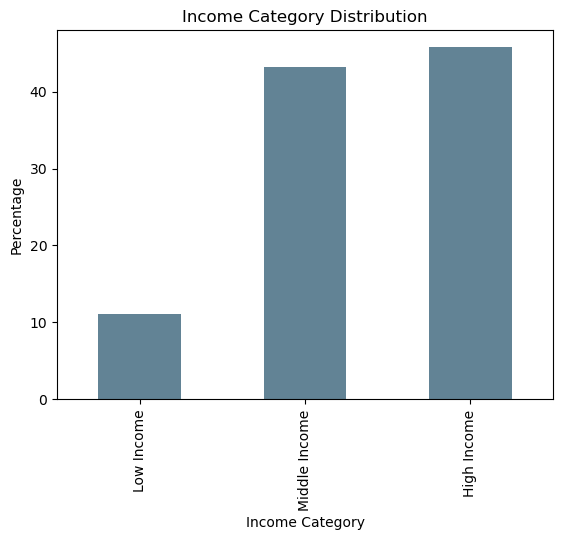

In [25]:
# Plot the percentage distribution of income categories
percentage_distribution = (small['income_category'].value_counts(normalize=True) * 100).sort_index()
percentage_distribution.plot.bar(color=['#628395'])
plt.xlabel('Income Category')
plt.ylabel('Percentage')
plt.title('Income Category Distribution')

In [36]:
# exporting bar chart
percentage_distribution.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income.png'))

AttributeError: 'Series' object has no attribute 'figure'

Text(0.5, 1.0, 'Income Category Distribution')

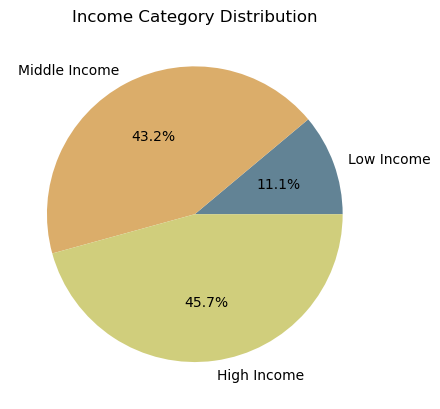

In [37]:
# Plot the pie chart
income_pie=plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct='%1.1f%%', colors = ['#628395', '#DBAD6A', '#D0CE7C'])
plt.title('Income Category Distribution')

In [42]:
# exporting
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_income.png'))

<Figure size 640x480 with 0 Axes>

In [40]:
small['Age'].describe()

count   9719250.00
mean         49.46
std          18.49
min          18.00
25%          33.00
50%          49.00
75%          65.00
max          81.00
Name: Age, dtype: float64

In [43]:
#making age-group column
def age_label(row):
    if row['Age'] <= 24:
        return 'young-adult'
    elif 24 < row['Age'] <= 44:
        return 'adult'
    elif 44 < row['Age'] < 60:
        return 'middle-age'
    else:
        return 'senior'

In [44]:
small['age_group'] = small.apply(age_label, axis=1)

C:\Users\ThinkPad T570\AppData\Local\Temp\ipykernel_9412\3545808766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['age_group'] = small.apply(age_label, axis=1)


In [43]:
small['age_group'].value_counts()

age_group
senior         3319578
adult          3033032
middle-age     2293744
young-adult    1072896
Name: count, dtype: int64

In [45]:
# Calculating the percentage distribution of age groups
percentage_distribution_age = (small['age_group'].value_counts(normalize=True) * 100).sort_index()

In [48]:
# Defining colors
colors = ['#628395', '#DBAD6A', '#CF995F', '#D0CE7C']

Text(0.5, 1.0, 'Age Group Distribution')

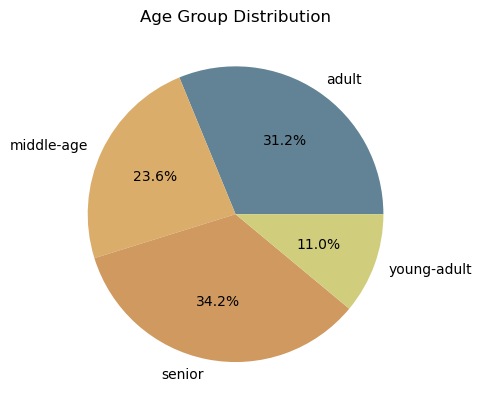

In [49]:
# Plot the pie chart with specified colors
pie_age_groups=plt.pie(percentage_distribution_age, labels=percentage_distribution_age.index, autopct='%1.1f%%', colors=colors)
plt.title('Age Group Distribution')

In [50]:
# exporting
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_age_group.png'))

<Figure size 640x480 with 0 Axes>

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

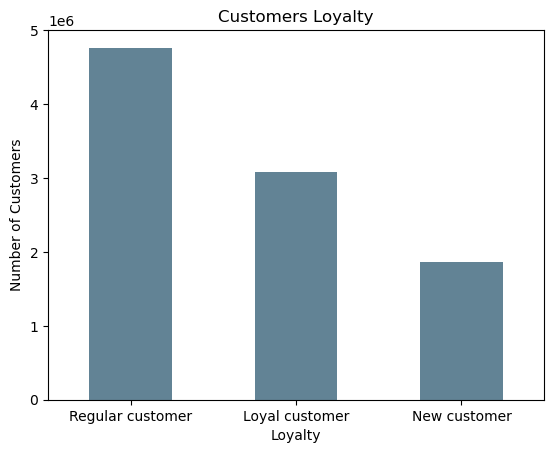

In [51]:
# Creating a bar chart for showing the loyaltiy and number of orders
bar_orders_loyalty = small['loyalty_flag'].value_counts().plot.bar(title = 'Customers Loyalty', xlabel = 'Loyalty', ylabel = 'Number of Customers', color = '#628395')
plt.xticks(rotation=0)

In [52]:
# Exporing
bar_orders_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_loyalty.png'))

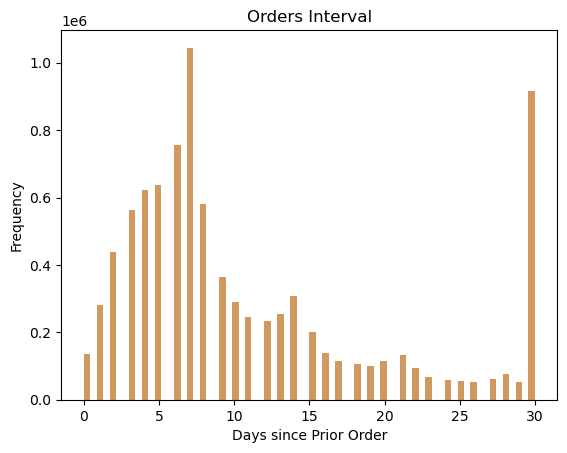

In [53]:
#order Interval  histogram
hist_order_interval = small['days_since_prior_order'].plot.hist(bins = 70, title = 'Orders Interval', xlabel = 'Days since Prior Order', color = '#CF995F')

In [54]:
# Exporing
hist_order_interval.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_interval.png'))

Context: This example assumes that 'Single adults' are young (age <= 35), low-income (income <= 30,000), have no dependents, and tend to buy goods from departments 5 and 9 (alcohol and pasta), primarily on weekends or late in the evening.

'Young parents' are also young (age <= 35), but have a higher income (income > 30,000), at least one dependent, and tend to buy goods from departments 17 and 18 (household and baby resp. child-related items), primarily on weekdays before noon.

In [55]:
def create_profile(row):
    age = row['Age']
    income = row['income']
    department = row['department_id']
    dependents = row['n_dependants']
    orders_day = row['order_dow']
    orders_hour = row['order_hour_of_day']

    if age <= 35 and income <= 30000 and dependents == 0 and department in [5, 9] and (orders_day in [5, 6] or orders_hour in range(18, 24)):
        return 'Single adult'
    elif age <= 35 and income > 30000 and dependents > 0 and department in [17, 18] and (orders_day in [1, 2, 3, 4] or orders_hour in range(9, 12)):
        return 'Young parent'
    else:
        return 'Other'

In [56]:
# executing the function
small['customer_profile'] = small.apply(create_profile, axis=1)

C:\Users\ThinkPad T570\AppData\Local\Temp\ipykernel_9412\1180168838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['customer_profile'] = small.apply(create_profile, axis=1)


## 06. Data Visualizations on Distribution of Profiles

In [57]:
#printing
small['customer_profile'].value_counts(dropna=False)

customer_profile
Other           9671867
Young parent      47257
Single adult        126
Name: count, dtype: int64

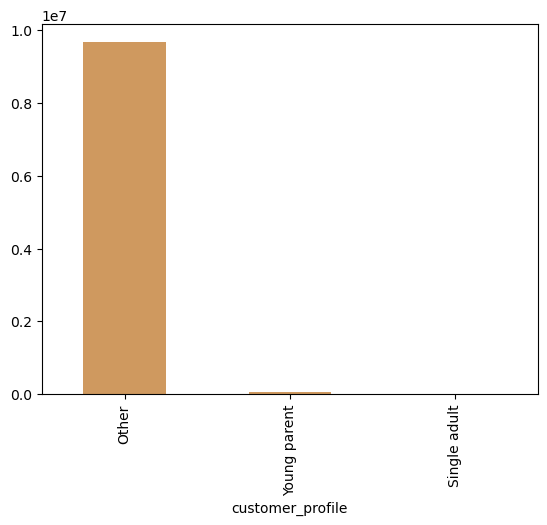

In [59]:
# creating a bar chart
bar = small['customer_profile'].value_counts().plot.bar(color = '#CF995F')

In [60]:
# exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile.png'))

## 07. Usage Frequency and Expenditure

In [25]:
# Group by customer_id and calculate max, mean, and min
profile_aggregated = small.groupby('Region').agg({
    'Age': ['max', 'mean', 'min'],
    'n_dependants': ['max', 'mean', 'min']
}).reset_index()

In [26]:
# Rename columns for clarity
profile_aggregated.columns = ['user_id', 
                              'max_age', 'mean_age', 'min_age',
                              'max_dependants', 'mean_dependants', 'min_dependants']

In [27]:
# Display the aggregated DataFrame
print(profile_aggregated)

     user_id  max_age   mean_age  min_age  max_dependants  mean_dependants  \
0    Midwest       81  49.454629       18               3         1.491892   
1  Northeast       81  49.601439       18               3         1.505519   
2      South       81  49.317007       18               3         1.502672   
3       West       81  49.560667       18               3         1.507780   

   min_dependants  
0               0  
1               0  
2               0  
3               0  


## 08. Comparing Customer Profiles with Regions and Departments

In [28]:
# Cross-tabulation between customer profiles and regions
profile_region_crosstab = pd.crosstab(small['customer_profile'], small['Region'])

In [29]:
# Cross-tabulation between customer profiles and departments
profile_department_crosstab = pd.crosstab(small['customer_profile'], small['department_id'])

In [30]:
# Print the resulting cross-tabulations
print(profile_region_crosstab)

Region            Midwest  Northeast    South     West
customer_profile                                      
Other             2267844    1707186  3222253  2474584
Single adult           40         24       34       28
Young parent        11304       8513    15629    11811


In [31]:
print(profile_department_crosstab)

department_id         1      2       3        4      5      6       7      8   \
customer_profile                                                                
Other             670824  10862  352090  2841805  45716  80828  805891  29410   
Single adult           0      0       0        0     19      0       0      0   
Young parent           0      0       0        0      0      0       0      0   

department_id         9      10  ...      12      13      14      15       16  \
customer_profile                 ...                                            
Other             259625  10418  ...  212561  562701  210475  320117  1620731   
Single adult         107      0  ...       0       0       0       0        0   
Young parent           0      0  ...       0       0       0       0        0   

department_id         17      18      19      20     21  
customer_profile                                         
Other             191108  109731  866688  315276  20538  
Single adult  

## 09. Data Visualization

In [61]:
# Mapping of department IDs to department names
department_mapping = {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli",
}

In [62]:
# Create the 'department_name' column
small['department_name'] = small['department_id'].map(department_mapping).fillna("missing")

C:\Users\ThinkPad T570\AppData\Local\Temp\ipykernel_9412\974524927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['department_name'] = small['department_id'].map(department_mapping).fillna("missing")


In [63]:
# Create a dataframe to group the data by 'department_name' and 'region'
df_dep_region= small.groupby(['department_name', 'Region']).size().unstack()

In [64]:
df_dep_region = df_dep_region.sort_values(by = 'South', ascending = False)

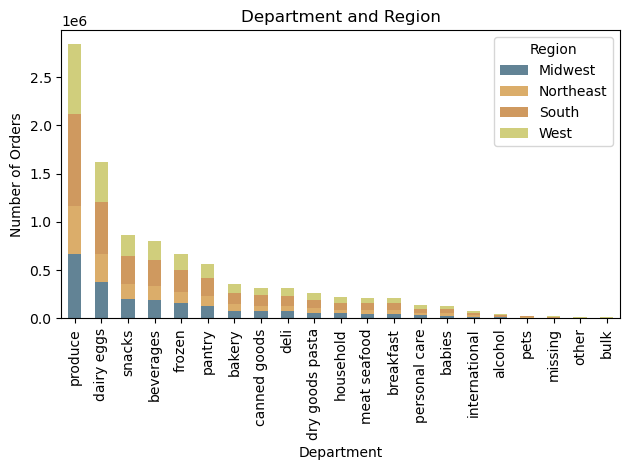

In [65]:
# Plot the data using a bar chart
colors = ['#628395', '#DBAD6A', '#CF995F', '#D0CE7C']
bar_dep_region =df_dep_region.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department and Region')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [66]:
# exporting
bar_dep_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department-stacked.png'))

In [76]:
# Products Poularity
#customer profile and sales 
product_pop = small.groupby('product_name')['order_number'].sum()

In [77]:
product_pop_sort= product_pop.sort_values(ascending=False)

In [83]:
colors = plt.cm.Purples(np.linspace(0.8, 0.3, len(product_pop_sort)))

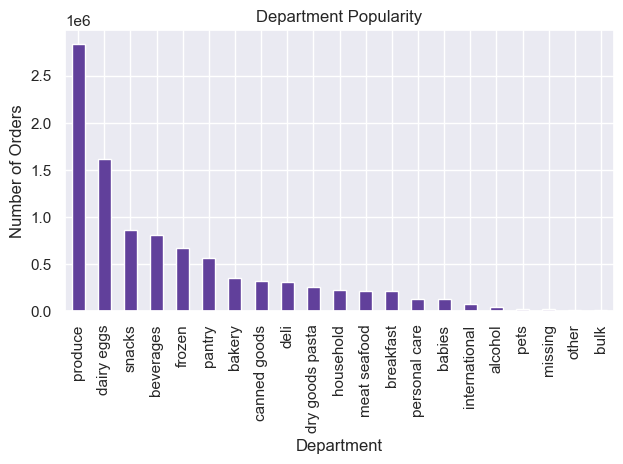

In [79]:
bar_depart_pop = small['department_name'].value_counts(dropna = False).plot.bar(title = 'Department Popularity', xlabel = 'Department', ylabel = 'Number of Orders', color = colors)
plt.tight_layout()

In [80]:
# exporting
bar_depart_pop.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department-popularity.png'))

In [84]:
# Create a dataframe to group the data by 'department_name' and 'loyalty_flag'
df_small_grouped = small.groupby(['department_name', 'loyalty_flag']).size().unstack()

In [85]:
df_small_grouped = df_small_grouped.sort_values(by = 'Regular customer', ascending = False)

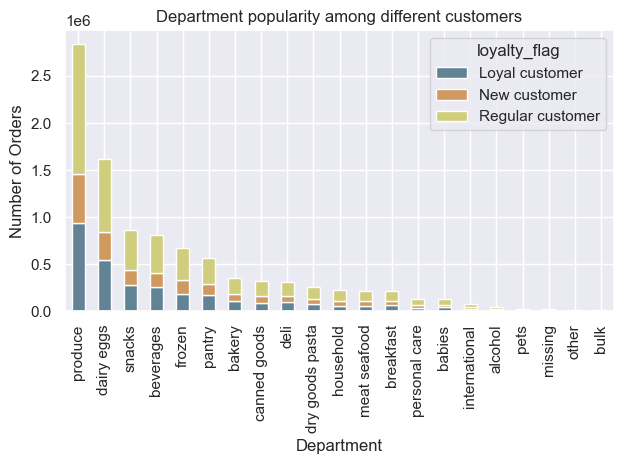

In [86]:
# Plot the data using a bar chart
colors = ['#628395', '#CF995F','#D0CE7C']
bar_dep_grouped = df_small_grouped.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department popularity among different customers')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [87]:
# Exporting
bar_dep_grouped.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department-Loyalty.png'))

C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


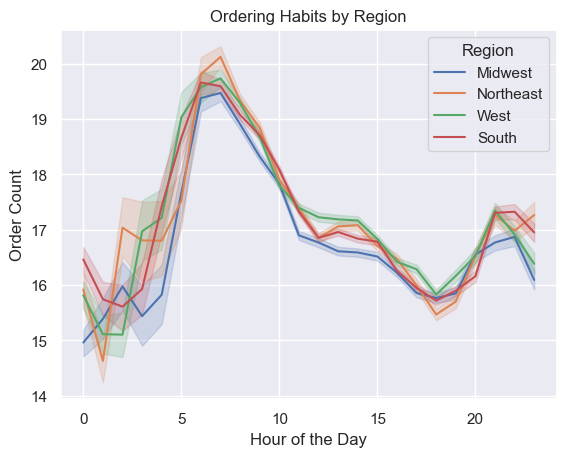

In [68]:
# Line chart using seaborn
sns.set_theme(style="darkgrid")  # Set the seaborn theme if needed
line_chart = sns.lineplot(data=small, x='order_hour_of_day', y='order_number', hue='Region')

# Set the title and labels
plt.title('Ordering Habits by Region')
plt.xlabel('Hour of the Day')
plt.ylabel('Order Count')

# Display the legend
plt.legend(title='Region', loc='upper right')

# Show the plot
plt.show()

In [69]:
# exporting
line_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_region-order.png'))

Text(0.5, 1.0, 'Family Status Distribution')

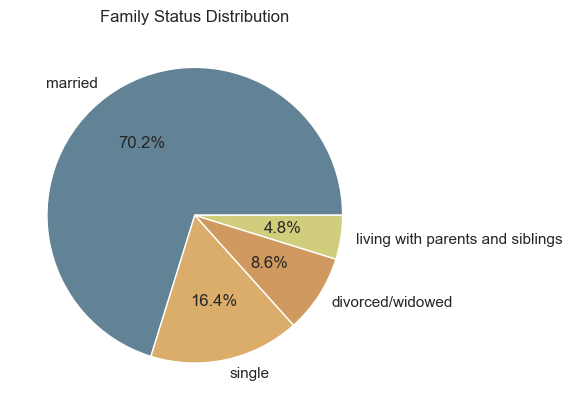

In [70]:
# Assuming df_s['fam_status'] is a categorical variable
family_status_counts = small['fam_status'].value_counts()

# Plotting pie chart with percentages
pie_fam_status=plt.pie(family_status_counts, labels=family_status_counts.index, autopct='%1.1f%%', colors=['#628395', '#DBAD6A', '#CF995F', '#D0CE7C'])

# Adding title
plt.title('Family Status Distribution')

In [ ]:
# exporting
pie_fam_status.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_fam_status.png'))

In [92]:
# Create a depend_flag to indicate whether the customers have dependants or not
small['avg_dependant'] = small.groupby(['user_id'])['n_dependants'].transform('mean')

C:\Users\ThinkPad T570\AppData\Local\Temp\ipykernel_9412\574680483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['avg_dependant'] = small.groupby(['user_id'])['n_dependants'].transform('mean')


In [93]:
small.loc[small['avg_dependant'] > 0, 'depend_flag'] = 'With Dependants'

C:\Users\ThinkPad T570\AppData\Local\Temp\ipykernel_9412\4194016001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small.loc[small['avg_dependant'] > 0, 'depend_flag'] = 'With Dependants'


In [94]:
small.loc[small['avg_dependant'] <= 0, 'depend_flag'] = 'Without Dependants'

In [95]:
small['depend_flag'].value_counts(dropna = False)

depend_flag
With Dependants       7289903
Without Dependants    2429347
Name: count, dtype: int64

In [96]:
# Convert 'depend_flag' and 'income_category' to string
small['income_category'] = small['income_category'].astype(str)

C:\Users\ThinkPad T570\AppData\Local\Temp\ipykernel_9412\1582772563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['income_category'] = small['income_category'].astype(str)


In [97]:
# Creating the customer_profile column
small['customer_profile'] = small['age_group'] + '_' + small['income_category'] + '_' + small['depend_flag']

C:\Users\ThinkPad T570\AppData\Local\Temp\ipykernel_9412\3269174846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['customer_profile'] = small['age_group'] + '_' + small['income_category'] + '_' + small['depend_flag']


In [98]:
small.head()

,product_id,product_name,department_id,prices,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,...,n_dependants,fam_status,income,Region,income_category,age_group,customer_profile,department_name,avg_dependant,depend_flag
0,1,Chocolate Sandwich Cookies,19,5.80,138,28,6,11,3.00,5,...,1,married,49620,Midwest,Low Income,senior,senior_Low Income_With Dependants,snacks,1.00,With Dependants
2,907,Premium Sliced Bacon,12,20.00,138,1,5,13,NaN,4,...,1,married,49620,Midwest,Low Income,senior,senior_Low Income_With Dependants,meat seafood,1.00,With Dependants
3,907,Premium Sliced Bacon,12,20.00,138,10,5,14,6.00,1,...,1,married,49620,Midwest,Low Income,senior,senior_Low Income_With Dependants,meat seafood,1.00,With Dependants
6,4913,Table Water Crackers,19,4.40,138,23,5,13,24.00,3,...,1,married,49620,Midwest,Low Income,senior,senior_Low Income_With Dependants,snacks,1.00,With Dependants
10,7987,Hazelnut Spread with Cocoa,13,12.80,138,5,0,9,14.00,3,...,1,married,49620,Midwest,Low Income,senior,senior_Low Income_With Dependants,pantry,1.00,With Dependants


In [99]:
#customer profile and sales 
customer_profile_sale = small.groupby('customer_profile')['prices'].sum()

In [100]:
customer_profile_sale_sorted = customer_profile_sale.sort_values(ascending=False)

In [101]:
colors = plt.cm.Reds(np.linspace(0.8, 0.3, len(customer_profile_sale_sorted)))

In [102]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

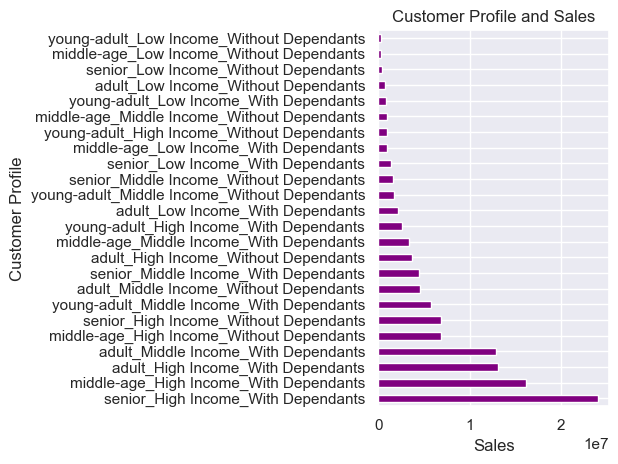

In [103]:
bar_customer_profile = customer_profile_sale_sorted.plot.barh(title = 'Customer Profile and Sales', xlabel = 'Sales', ylabel = 'Customer Profile', color = 'purple')
plt.tight_layout()

In [104]:
# exporting
bar_customer_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile.png'))